# Quickstart for Pytorch

自己制作并划分数据集
===================

关于数据
-----------------
Pytorch 有两个关于数据（Data）的函数包：
``torch.utils.data.DataLoader`` 和 ``torch.utils.data.Dataset``.

``Dataset`` 存储数据样本及其对应的标签（label）

``DataLoader`` 用来不断从 ``Dataset``.中读取数据

In [57]:
import torch        #加在pytorch工具包
from torch import nn  #将torch.nn 定义一个别名 nn
from torch.utils.data import DataLoader  
#from torchvision import datasets           #加载pytorch官方提供的dataset
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor
import os, random, glob
import matplotlib.pyplot as plt
os.environ['CUDA_VISIBLE_DEVICES']='0,1,2,3,4,5,6,7'
import cv2

import numpy as np
# Define my data
from PIL import Image
from torchvision import transforms
from torchvision.datasets import ImageFolder

自定义一个数据的函数，从torch.utils.data.Dataset中继承

In [58]:
def func5(path):
    frame = cv2.imread(path)
    frame = cv2.resize(frame,(100,100))
    frame = cv2.GaussianBlur(frame,(5,5),0)
    # downsize it to reduce processing time
    converted = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) # Convert from RGB to HSV
    lowerBoundary = np.array([0,40,30],dtype="uint8")
    upperBoundary = np.array([43,255,254],dtype="uint8")
    skinMask = cv2.inRange(converted, lowerBoundary, upperBoundary)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3, 3))
    
    img = cv2.dilate(skinMask,kernel)

    img = cv2.erode(img,kernel)

    edges = cv2.Canny(img, 30, 70)  # canny边缘检测 

#    cv2.imshow('wsdwe',edges)
#    cv2.waitKey(0)
#    cv2.destroyAllWindows()
    return edges  

In [59]:
class MyDataset(Dataset):
    def __init__(self, filenames, labels, transform):
        self.filenames = filenames
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.filenames)

    def __getitem__(self, idx):
        # image = Image.open(self.filenames[idx]).convert('RGB')
        image = func5(self.filenames[idx])
        image = self.transform(image)
#         image = image[..., None]
#         image = np.tile(image, (1, 1, 3))
        return image, self.labels[idx]

    
transformer_ImageNet = transforms.Compose([
  #   transforms.Resize((300, 300)),
    transforms.ToTensor()
])

In [60]:
def split_Train_Val_Data(data_dir, ratio):
    """ the sum of ratio must equal to 1"""
    dataset = ImageFolder(data_dir)     # data_dir精确到分类目录的上一级 即 'Train_Data'
    character = [[] for i in range(len(dataset.classes))]
    #print(dataset.class_to_idx)
    for x, y in dataset.samples:  # 将数据按类标存放
        character[y].append(x)
    #print(dataset.samples)

    train_inputs, val_inputs, test_inputs = [], [], []
    train_labels, val_labels, test_labels = [], [], []
    for i, data in enumerate(character):   # data为一类图片
        num_sample_train = int(len(data) * ratio[0])
        #print(num_sample_train)
        num_sample_val = int(len(data) * ratio[1])
        num_val_index = num_sample_train + num_sample_val
        for x in data[:num_sample_train]:
            train_inputs.append(str(x))
            train_labels.append(i)
        for x in data[num_sample_train:num_val_index]:
            val_inputs.append(str(x))
            val_labels.append(i)
    #print(len(train_inputs))
    train_dataloader = DataLoader(MyDataset(train_inputs, train_labels, transformer_ImageNet),
                                  batch_size=8, shuffle=True)
    val_dataloader = DataLoader(MyDataset(val_inputs, val_labels, transformer_ImageNet),
                                  batch_size=8, shuffle=False)

    return train_dataloader, val_dataloader

In [ ]:
## 训练与测试数据集路径
# data_path = '../../data/MNIST'
# train_img_path = os.path.join(data_path, 'train-images')
# print(train_img_path)
# train_label_path = os.path.join(data_path, 'train-labels.txt')
# test_img_path = os.path.join(data_path, 't10k-images')
# test_label_path = os.path.join(data_path, 't10k-labels.txt')

# training_data = MyData('./Train_Data')
# test_data = MyData(test_img_path, test_label_path)

In [ ]:
# print(type(training_data[1]))
# # print(np.array(training_data).shape)
# import time

In [ ]:
# fig = plt.figure()
# for im, label in training_data:
#     print(type(im), im.shape, label)
#     fig = plt.figure() # 画多个图
#     plt.imshow(im[0].numpy(), cmap='gray') # [1, 28, 28]  -> [28, 28] 使得 imshow 能够正确表示
#     plt.show()
#     time.sleep(2)
#     plt.clf()
    

In [ ]:
# print(training_data[10][1])
# img = training_data[10][0].permute(1, 2, 0)   # [3, 300, 300] -> [300, 300, 3]
# plt.imshow(img)

In [ ]:
# 另一种展示的办法

# import matplotlib.pyplot as plt
# im = training_data[0][0]
# print(im.shape)
# im = im[0,...,None]
# print(im.shape)
# print(im.repeat([1, 1, 3]).shape)
# plt.imshow(im.repeat([1,1,3]), cmap='gray')


In [61]:
data_dir = './data/Dataset'
train_dataloader, val_dataloader = split_Train_Val_Data(data_dir, [0.8, 0.2])

Shape of X [N, C, H, W]:  torch.Size([8, 1, 100, 100])
tensor(0) tensor(0) tensor(0) tensor(0) tensor(0) tensor(0) tensor(0)
52


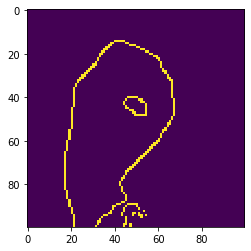

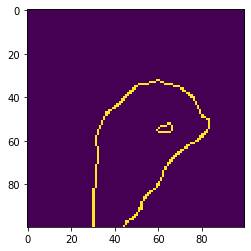

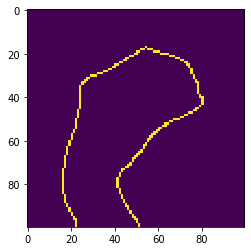

In [84]:
for X, y in val_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    # print("Shape of y: ", y.shape, y.dtype)
    print(y[0],y[1],y[2],y[3],y[4],y[5],y[6])
    plt.imshow(X[0][0])
    plt.figure()
    plt.imshow(X[1][0])
    plt.figure()
    plt.imshow(X[2][0])
    break
print(len(val_dataloader))
# print(len(val_dataloader))

我们把``Dataset``当做一个参数送入 ``DataLoader``函数中，从而使我们的数据集自动分批，可以用于抽样，打乱顺序等操作

此处，我们定义批量大小=64，也就是说：从dataloader中可以不断迭代地的抽取64组数据与相应标签

Shape of X [N, C, H, W]:  torch.Size([8, 1, 100, 100])
tensor(8) tensor(4) tensor(8) tensor(5) tensor(1) tensor(8) tensor(1)
torch.Size([8])
207


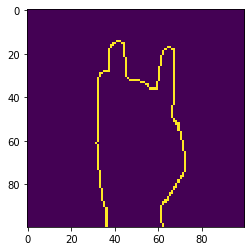

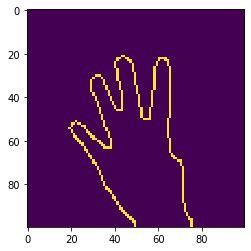

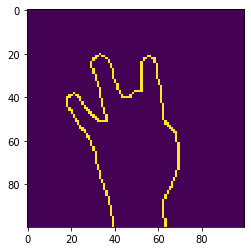

In [90]:
# batch_size = 64
# print(type(training_data))
# Create data loaders.
# train_dataloader = DataLoader(training_data, batch_size=batch_size, 
#                               shuffle=True, num_workers=10)
# test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in train_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    # print("Shape of y: ", y.shape, y.dtype)
    print(y[0],y[1],y[2],y[3],y[4],y[5],y[6])
    plt.imshow(X[0][0])
    plt.figure()
    plt.imshow(X[1][0])
    plt.figure()
    plt.imshow(X[2][0])
    print(y.shape)
    break
print(len(train_dataloader))
# print(len(val_dataloader))

In [ ]:
len(train_dataloader)

构建模型
------------------
为了定义一个神经网络，我们构架一个从`nn.Module`继承过来的类函数，

我们定义在``__init__`` 函数下定义网络层，并明确数据将送入并通过一个叫 ``forward``的函数

为了加速神经网络的计算，我们把运算搬到GPU上（当GPU存在时）

In [99]:
# 搭建一个全连接神经网络
class FCNet(nn.Module):
    def __init__(self):
        super(FCNet, self).__init__()
        self.flatten = nn.Flatten()  # [100, 100] -> [100 * 100] 展平
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(100 * 100 , 1000),
            nn.ReLU(),
            nn.Linear(1000, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        out = self.linear_relu_stack(x)
        return out

In [100]:
model = FCNet()  #模型
print(model)
y = model(X)
print(y.shape)

FCNet(
  (flatten): Flatten()
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=10000, out_features=1000, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1000, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)
torch.Size([8, 10])


In [ ]:
import torch.nn.functional as F
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        # (3,300,300)
        self.conv1=nn.Conv2d(3,10,5,padding=2) # (10,300,300)
        self.conv2=nn.Conv2d(10,16,3,padding=1) # (16,150,150)
        self.fc1 = nn.Linear(16*75*75,1000) # (1000)
        self.fc2 = nn.Linear(1000,200)
        self.fc3 = nn.Linear(200, 2)
        self.dropout = nn.Dropout(0.25)
    def forward(self,x):
        in_size = x.size(0)
        out = self.conv1(x)
        out = F.relu(out)
        out = F.max_pool2d(out, 2, 2)
        out = self.conv2(out)
        out = F.relu(out)
        out = F.max_pool2d(out,2,2)
        out = out.view(in_size,-1) # 扁平化flat然后传入全连接层
        out = self.fc1(out)
        out = F.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = F.relu(out)
        out = self.dropout(out)
        out = self.fc3(out)
        return out

In [ ]:
model = ConvNet()
print(model)
y = model(X)
print(y.shape)

In [138]:
from torchvision import models
resnet50 = models.resnet50(pretrained=True)  

In [139]:
resnet50.fc = nn.Linear(2048, 10)
# resnet50.conv1 = nn.Conv2d(1, resnet50.in_channel, kernel_size=7, stride=2,padding=3, bias=False)

In [140]:
model = resnet50
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)

优化模型参数
----------------------------------------
初始化模型

In [126]:
from torch.nn import init
#定义一个参数初始化的函数
def weigth_init(m):
    if isinstance(m, nn.Conv2d):
#         init.xavier_uniform_(m.weight.data)
#         init.constant_(m.bias.data, 0.1)
        # print('Yes')
    
        m.weight.data.normal_(0, 0.01)
        m.bias.data.zero_()
    elif isinstance(m, nn.Linear):
        m.weight.data.normal_(0, 0.01)
        m.bias.data.zero_()
        print('Using FCNet')

In [102]:
model.apply(weigth_init)  #模型参数初始化
# model = nn.DataParallel(model)
# model = model.cuda()

Using FCNet
Using FCNet
Using FCNet


FCNet(
  (flatten): Flatten()
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=10000, out_features=1000, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1000, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

优化模型参数
----------------------------------------

为了训练网络，我们需要一个损失函数（loss function）以及一个优化器（optimizer）

对于分类任务，我们使用交叉熵损失函数 CrossEntropyLoss, 

该例子中，我们采用名叫 SGD (随机梯度下降) 的优化器，并设置学习率（learning rate）为 0.01

In [141]:
loss_fn = nn.CrossEntropyLoss()   # 定义损失函数
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)    #定义优化器



# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

Using cuda device


在训练中的每一次循环中，我们把一个批量（在该例子中是64个数据对）的数据送入模型中，模型做出相应预测

并将模型预测与标签之间的误差，进行后向传播（backpropagation），并利用优化器对模型参数进行调整更新

In [142]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for iteration, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        
        # 前向传播
        pred = model(X)   #模型预测
        loss = loss_fn(pred, y)   #计算损失函数  # y进行了广播
        
        # 后向传播 （Backpropagation）：固定的3个步骤
        optimizer.zero_grad()   # 优化器置零
        loss.backward()        # 后向传播
        optimizer.step()       # 参数更新

        if iteration % 20 == 0:
            loss, current = loss.item(), iteration * len(X)
            print("loss: %.4f, current:%5d/size:%5d" %(loss, current, size))

我们利用测试数据 对模型的性能进行再次的检查确认，以保证模型是在沿着正确的趋势学习

In [143]:
def test(dataloader, model):
    size = len(dataloader.dataset)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()    
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= size
    correct /= size
    print("Test Result\n  Accuracy: %.1f,  Average loss:%.8fd \n" %(100*correct, test_loss))

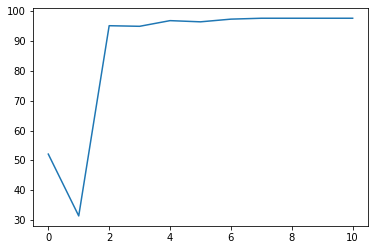

In [147]:
accuracy = [52.1, 31.4, 95.1, 94.9, 96.8, 96.4, 97.3, 97.6, 97.6, 97.6, 97.6]
plt.plot(accuracy)
plt.show()

上述训练过程需要进行多个轮回（epoch）的迭代。在每个epoch期间，模型通过学习，对参数不断调整，从而进行更好的预测

我们将模型的分类准确率和损失函数值显示出来

我们希望看到：随着不断迭代，模型的准确率越来越高，损失函数值越来越低

In [144]:
epochs = 200
model = model.to(device)        # 十分重要，如果不加这一步，无法读取之前已经训练的模型
#model = cnn_model.to(device)
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(val_dataloader, model)
print("Done!")

Epoch 1
-------------------------------
loss: 2.3531, current:    0/size: 1649
loss: 2.2786, current:  160/size: 1649
loss: 2.2930, current:  320/size: 1649
loss: 2.2357, current:  480/size: 1649
loss: 2.2268, current:  640/size: 1649
loss: 1.8931, current:  800/size: 1649
loss: 2.3022, current:  960/size: 1649
loss: 1.9578, current: 1120/size: 1649
loss: 1.9760, current: 1280/size: 1649
loss: 2.0985, current: 1440/size: 1649
loss: 2.0521, current: 1600/size: 1649
Test Result
  Accuracy: 52.1,  Average loss:0.21176694d 

Epoch 2
-------------------------------
loss: 1.4797, current:    0/size: 1649
loss: 2.0244, current:  160/size: 1649
loss: 1.7004, current:  320/size: 1649
loss: 1.4234, current:  480/size: 1649
loss: 1.7541, current:  640/size: 1649
loss: 0.7355, current:  800/size: 1649
loss: 0.9987, current:  960/size: 1649
loss: 0.7177, current: 1120/size: 1649
loss: 1.2488, current: 1280/size: 1649
loss: 0.3323, current: 1440/size: 1649
loss: 0.0569, current: 1600/size: 1649
Test

--------------




In [ ]:
accuracy = []

保存模型
-------------
保存一个模型的一个通用方法：将模型的参数状态保存下来

In [148]:
torch.save(model.state_dict(), "Gesture-digits.pth")
print("Saved PyTorch Model State to Gesture-digits.pth")

Saved PyTorch Model State to Gesture-digits.pth


加载模型
----------------------------
若没有模型，需要构建模型

加载模型：将模型参数的状态加载给它

In [151]:
#model = FCNet()  #调用模型
#model = CNNNet()  #调用模型
model.load_state_dict(torch.load("Gesture-digits.pth"))

<All keys matched successfully>

In [150]:
def img_preprocess(img_path):
    img = func5(img_path)
    img = transformer_ImageNet(img)
    return img    

如此，模型现在可以用来做预测了

Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 2, Actual: 2
Predicted: 3, Actual: 3
Predicted: 4, Actual: 4
Predicted: 5, Actual: 5
Predicted: 6, Actual: 6
Predicted: 7, Actual: 7
Predicted: 8, Actual: 8
Predicted: 9, Actual: 9


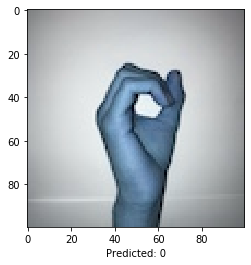

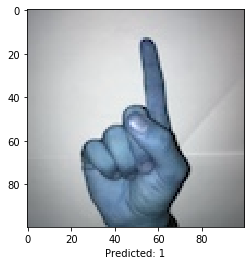

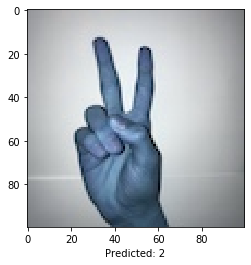

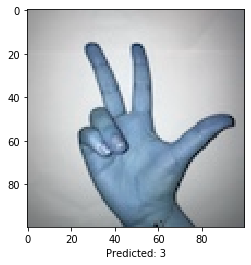

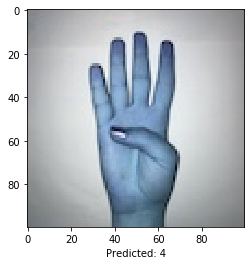

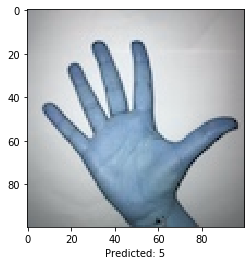

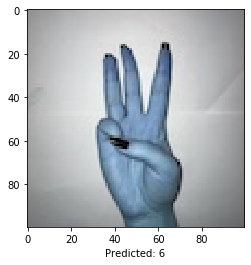

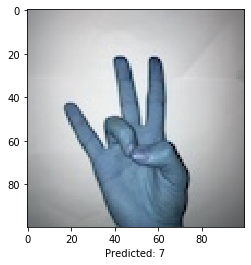

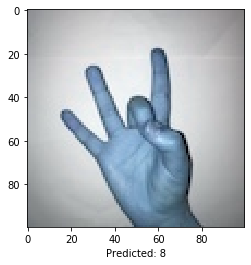

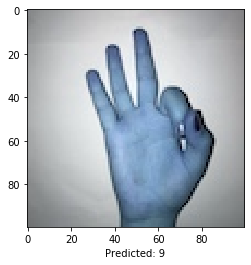

In [156]:
classes = [
    "0",
    "1",
    "2",
    "3",
    "4",
    "5",
    "6",
    "7",
    "8",
    "9"
]

model.eval()
model = model.to(device)
# x, y = test_data[0][0], test_data[0][1]    # 此时，x.shape= [1, 28, 28], y 表示标签
# x = x[None, ...].to(device)     # [1, 28, 28] -> [1, 1, 28, 28] 
# # print(x.shape)
for i in range(10):
    
    img_path = './data/Examples/example_' + str(i) + '.JPG'
    image = img_preprocess(img_path)
    # print(type(image))
    # print(image.shape)
    # print(image.shape)
    # plt.imshow(image)
    image = image[None, ...].to(device)
    # dog = dog[None, ...].to(device)

    # print(cat.shape)

    with torch.no_grad():
        pred = model(image)
        predicted, actual = classes[pred[0].argmax(0)], str(i)
        print("Predicted: %s, Actual: %s" %(predicted, actual))
        plt.figure()
        plt.xlabel(f'Predicted: {predicted}')
        plt.imshow(cv2.imread(img_path))
        # print(type(x[0][0].cpu()))
    # with torch.no_grad():
    #     pred = model(cat)
    #     predicted, actual = classes[pred[0].argmax(0)], 'cat'
    #     print("Predicted: %s, Actual: %s" %(predicted, actual))
    #     plt.figure()
    #     plt.imshow(cat[0].permute(1, 2, 0).cpu())
    #     # print(type(x[0][0].cpu()))


In [ ]:
xiaomao = Image.open('xiaomao.jpeg').convert('RGB')
xiaomao = transformer_ImageNet(xiaomao)
xiaomao = xiaomao[None, ...].to(device)
with torch.no_grad():
    pred = model(xiaomao)
    predicted, actual = classes[pred[0].argmax(0)], 'cat'
    print("Predicted: %s, Actual: %s" %(predicted, actual))
    plt.figure()
    plt.imshow(xiaomao[0].permute(1, 2, 0).cpu())
    # print(type(x[0][0].cpu()))

In [ ]:

for i in range(20):
    img = test_data[i][0]
    label = test_data[i][1]
    img = img[None, ...].to(device)
    with torch.no_grad():
        pred = model(img)
        predicted = classes[pred[0].argmax(0)]
        plt.figure()
        plt.xlabel(str(predicted))
        plt.imshow(img[0][0].cpu())


In [ ]:
pred

In [ ]:
# 利用softmax (使用 SGD 方法不用 softmax)
softmax = nn.Softmax()
softmax(pred)

In [ ]:
for i in range(20):
